In [90]:

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


class NetworkSimulation:
    def __init__(self,n,pe,pi=0.5,pr=0.5):
        self.n = n
        self.pe = pe
        self.pi = pi
        self.pr = pr
        
        self.g = nx.erdos_renyi_graph(n = self.n,p = self.pe)
        self.g.pos = nx.spring_layout(self.g)

        for i in self.g.nodes:
            self.g.nodes[i]['state'] = 1 if np.random.random() < .5 else 0
        
        self.infected_ratio = [0.5]
        self.timestep = 0

    
    def observe(self,axis=None):
        plt.cla()
        nx.draw(self.g, node_size=100, vmin = 0, vmax = 1,
                node_color = [self.g.nodes[i]['state'] for i in self.g.nodes],
                pos = self.g.pos, ax=axis)
        #plt.show()


# p_i = 0.5 # infection probability
# p_r = 0.5 # recovery probability


    def update(self): #asynch
        self.timestep += 1
        
        for a in self.g.nodes:
            if self.g.nodes[a]['state'] == 0: # if susceptible
                self.g.nodes[a]['next_state'] = 0
                
                #b = np.random.choice(list(self.g.neighbors(a)))
                
                for b in list(self.g.neighbors(a)):
                    
                    if self.g.nodes[b]['state'] == 1: # if neighbor b is infected
                        if np.random.random() < self.pi:
                            self.g.nodes[a]['next_state'] = 1
                            
                            
                            
                        
            else: # if infected
                self.g.nodes[a]['next_state'] = 0 if np.random.random() < self.pr else 1


        for a in self.g.nodes:
            self.g.nodes[a]['state'] = self.g.nodes[a]['next_state']
        
        self.infected_ratio.append(
            sum([self.g.node[x]['state'] for x in self.g.nodes])/self.g.number_of_nodes())


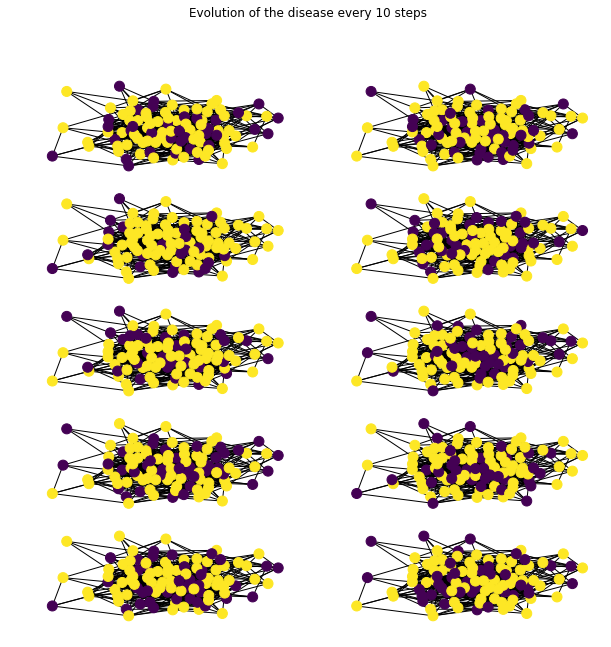

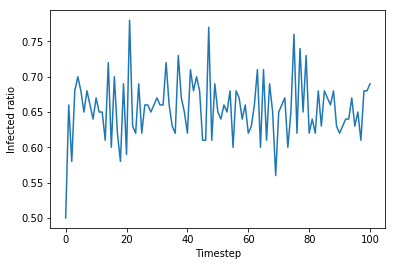

In [91]:
sim = NetworkSimulation(n=100,pe=0.1,pi=0.5,pr=0.5)
fig,axes = plt.subplots(5,2,figsize=(10,10))

fig.suptitle('Evolution of the disease every 10 steps')

for _ in range(100):
    sim.update()
    if _ % 10 == 0: 
        sim.observe(axis=axes.flatten()[_//10])
#         axes.flatten()[_//10].set_xlabel('a')
    
plt.show()

plt.plot(range(sim.timestep+1),sim.infected_ratio)
plt.ylabel('Infected ratio')
plt.xlabel('Timestep')
plt.show()

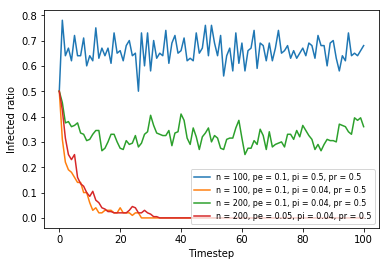

In [99]:
sims = [NetworkSimulation(n=100,pe=0.1,pi=0.5,pr=0.5),
        NetworkSimulation(n=100,pe=0.1,pi=0.04,pr=0.5),
        NetworkSimulation(n=200,pe=0.1,pi=0.04,pr=0.5),
        NetworkSimulation(n=200,pe=0.05,pi=0.04,pr=0.5)]


for sim in sims:
    for _ in range(100):
        sim.update()

for sim in sims:
    plt.plot(range(sim.timestep+1),sim.infected_ratio, label = 'n = {}, pe = {}, pi = {}, pr = {}'.format(sim.n,sim.pe,sim.pi,sim.pr))
plt.legend(fontsize=8, loc=4)
plt.xlabel('Timestep')
plt.ylabel('Infected ratio')
plt.show()

In [ ]:
# def update():
#     global g
#     listener = np.random.choice(list(g.nodes))
#     speaker = np.random.choice(list(g.neighbors(listener)))
#     g.nodes[listener]['state'] = g.nodes[speaker]['state']



# def update(): #asynch
#     global g
#     a = np.random.choice(list(g.nodes))
#     if g.nodes[a]['state'] == 0: # if susceptible
#         b = np.random.choice(list(g.neighbors(a)))
#         if g.nodes[b]['state'] == 1: # if neighbor b is infected
#             g.nodes[a]['state'] = 1 if np.random.random() < p_i else 0
#     else: # if infected
#         g.nodes[a]['state'] = 0 if np.random.random() < p_r else 1

